<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/X4Neural_Network_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis(1) (1).csv')
df2 = df[df['train'] == 1]
print(df2['y'].max())
ymax_train1 = df2['y'].max()
# sve sa train = 0 y = max(y) + 1

for i in range(df.shape[0]):
  if(df.iloc[i]['train'] == 0):
    df.loc[i, 'y'] = ymax_train1 + 1

lower_bound = df['n'] * df['av.length'] / df['m']
lower_bound = lower_bound.astype('int') + 1

upper_bound = np.minimum(df[' LPTUB'], df[' SLACKUB'])
df['rel. bound'] = (upper_bound-lower_bound)/(upper_bound)
df['rel. bound'] = df['rel. bound']*10000

df['category'] = df['y']
for i in range(df.shape[0]):
  #print(df.iloc[i]['y'])
  if(df.iloc[i]['y'] < 1):
    df.loc[i, 'category'] = 0
  elif(df.iloc[i]['y'] >= 1 and df.iloc[i]['y'] < 10):
    df.loc[i, 'category'] = 1
  else:
    df.loc[i, 'category'] = 2

print(df['category'].max())
print(df['y'].max())
shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus', ' LPTUB', ' SLACKUB', 'train']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

19.907111
2.0
20.907111


In [2]:
X_modified = X.drop([ 'rel. bound', 'median', 'range',  'max','k', 'av.length','indeks', 'class',  'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n','n'], axis = 1)
print(X_modified.head())
#X_modified = X.drop(['max', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'class', 'av.length'], axis = 1)

     m   n/m     std.dev  min  category
0   36  5.00   20.039488   47       0.0
1    8  4.50   24.744585   27       0.0
2   16  9.00  143.504593  263       0.0
3   16  2.25   24.744585   27       1.0
4  100  2.00   46.637669    1       0.0


In [3]:
from imblearn.over_sampling import RandomOverSampler

tmp = X_modified.drop(['category'], axis = 1)
tmp['y'] = y
tmp = tmp.sample(frac = 1).reset_index()
category = X_modified['category']

oversample = RandomOverSampler(random_state=0)
tmp, category = oversample.fit_resample(tmp, category.astype('int'))


y = tmp['y']
X_modified = tmp.drop(['y'], axis = 1)
print(X_modified.shape[0])
print(X_modified.head())

21840
   index   m  n/m     std.dev  min
0   2806  80  2.0   15.111367   50
1   3675   4  9.0   22.075682   23
2   3380  12  9.0   24.649858   20
3   6539   3  6.0   22.332088   25
4   7145  33  6.0  196.622818  286


In [4]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.83)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=1, include_bias=True)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

reg = LinearRegression().fit(X_train, y_train)





In [5]:
from sklearn.metrics import r2_score
prediction = reg.predict(X_test)
print("r_square score: ", r2_score(y_test,prediction))
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)
for i in range(len(yy)):
  if(yy[i]-predd[i] > 99000):
    print("real value of y_test: " + str(yy[i]) + " -> the predict: " + str(predd[i]))

r_square score:  0.21404304419301656


In [6]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd)) 

RMSE:


3.1002510717780845

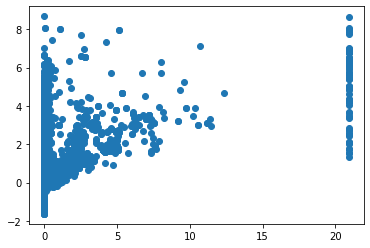

In [8]:
plt.scatter(yy, predd)